<a href="https://colab.research.google.com/github/AlexKazmin/SkillFactory-Projects/blob/main/OD_3_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82%D0%BE%D0%B2_%D0%90_%D0%91_%D1%82%D0%B5%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЦЕЛЬ

Туристическая фирма запустила новую акцию, чтобы продать как можно больше туров и разработали два варианта посадочной страницы. 

Необходимо проверить, какая из страниц приносит больше покупок.


# Задачи:
1. Провести первичный анализ датасета.
  - привести столбцы к корректным типам данных;
  - убедиться, что данные по обеим группам представлены за одинаковый период (визуализировать);
  - проверить корректность распределения участников теста;
  - проверить различие в группах;
  - проверить пересечение аудитории в группах;
  - определить по группам ряд показателей (количество пользователей, количество покупок, выручку, конверсию, средний чек);
  - посмотреть, как распределяются суммы покупок (визуализировать);
  - сделать первичные выводы.
2. Рассчитате кумулятивные метрики:
  - построить график конверсии в группах по дням;
  - построить график среднего чека в группах по дням;
  - построить график кумулятивных метрик по конверсии и по среднему чеку;
  - сделать выводы выводы.
3. Провести статистическую проверку гипотез:
  - о равенстве конверсии;
  - о равенстве выручки;
  - о равенстве средних чеков по дням.
4. Сформулировать вывод.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import random
import numpy as np
import math as mth

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Прочитаем файл:
df = pd.read_csv('/content/drive/MyDrive/SF/ab_data (1).csv')

In [6]:
# Выведем первые пять строк файла
df.head()

,Unnamed: 0,user_id,date,group,purchase,price
0,0,851104,2021-01-21,A,0,0
1,1,804228,2021-01-12,A,0,0
2,2,661590,2021-01-11,B,0,0
3,3,853541,2021-01-08,B,0,0
4,4,864975,2021-01-21,A,1,150000


In [7]:
# Воспользуемся методом info и выведем информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  294478 non-null  int64 
 1   user_id     294478 non-null  int64 
 2   date        294478 non-null  object
 3   group       294478 non-null  object
 4   purchase    294478 non-null  int64 
 5   price       294478 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.5+ MB


В Датасете всего 293 478 строк. Пропущенные значения отсутствуют. 
Столбец 'date' имеет типа данных object , необходимо привести его к типу данных datetime для дальнейшей корректной работы с ним.

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

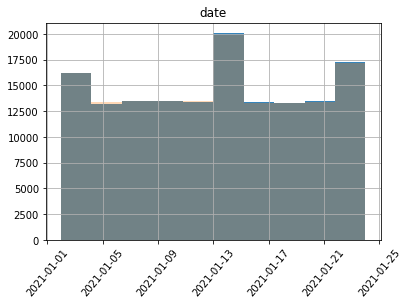

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  if __name__ == '__main__':


count                  294478
unique                     23
top       2021-01-08 00:00:00
freq                    13564
first     2021-01-02 00:00:00
last      2021-01-24 00:00:00
Name: date, dtype: object

In [9]:
# Построим гистограмму по столбцу date для каждой из групп;

ax = df[df['group'] == 'A'].hist('date', alpha=0.9)

df[df['group'] == 'B'].hist('date', ax=ax, alpha=0.3)
plt.xticks(rotation=50)
plt.show()

df['date'].describe()

На гистограмме видно, что тест проводился co 2 по 24 января. 

In [10]:
# проверим корректность распределения трафика по группам
df['group'].value_counts()

B    147276
A    147202
Name: group, dtype: int64

Трафик распределен практически равномерно. 

In [11]:
#Проверим разницу в различии
print('Разница между группами составляет {:.2%}'.format((df['group'].value_counts().B - df['group'].value_counts().A) / df['group'].value_counts().A))

Разница между группами составляет 0.05%


Трафик отличается менее чем на 1 процент. Можно считать распределение корректным.

In [12]:
# Проверить пересечение аудитории в группах
# Создадим сводную таблицу
cross = df.pivot_table(index='user_id',
              columns='group',
              values='date',
              aggfunc='max')

In [13]:
# Из получившейся выше сводной таблицы выведем столбцы, где А и Б заполнены
cross[(~cross['A'].isna()) & (~cross['B'].isna())]

group,A,B
user_id,,
630320,2021-01-07,2021-01-12
630805,2021-01-22,2021-01-12
630871,2021-01-08,2021-01-03
630887,2021-01-07,2021-01-22
631008,2021-01-21,2021-01-22
...,...,...
945272,2021-01-14,2021-01-18
945308,2021-01-20,2021-01-03
945369,2021-01-15,2021-01-24


 Мы получили 1 895 идентификаторов пользователей, которые видели оба варианта теста; Так как мы не можем определить какая из версий сайта повлияла на принятие ими решения, исключим этих пользователей;

In [14]:
df1 = df[~df['user_id'].isin(cross[(~cross['A'].isna()) & (~cross['B'].isna())].index)]

In [15]:
# Проверим как изменилось соотношение пользователей в группах после очистки:
df1['group'].value_counts()

B    145381
A    145307
Name: group, dtype: int64

In [16]:
(df1['group'].value_counts()[0] - df1['group'].value_counts()[1]) / df1['group'].value_counts()[0] * 100

0.05090073668498634

Группы по-прежнему отличаются не более чем на 1 процент. Можем продолжать исследование.

In [17]:
# Определить количество покупок, выручку и средний чек по группам;
total_data = df1.groupby('group').agg({'user_id':'count', 'purchase':'sum', 'price':'sum'}).reset_index()

In [18]:
total_data

,group,user_id,purchase,price
0,A,145307,17487,1417780000
1,B,145381,17290,1533010000


In [19]:
# Посчитаем конверсию по группам
total_data['conversion'] = round(total_data['purchase'] / total_data['user_id'] * 100, 2)

In [20]:
# Посчитаем средний чек
total_data['ave_price'] = round(total_data['price'] / total_data['purchase'], 2)

In [21]:
total_data

,group,user_id,purchase,price,conversion,ave_price
0,A,145307,17487,1417780000,12.03,81076.23
1,B,145381,17290,1533010000,11.89,88664.55


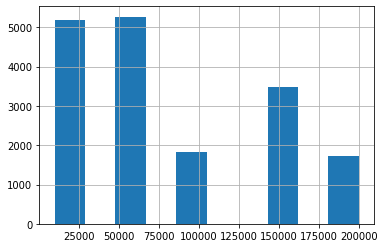

In [22]:
# Гистограмма для группы А
df1[(df1['purchase'] == 1) & (df1['group'] == 'A')]['price'].hist()



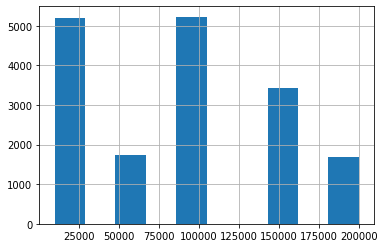

In [23]:
# Гистограмма для группы Б
df1[(df1['purchase'] == 1) & (df1['group'] == 'B')]['price'].hist()

### Сделайте первичные выводы:
Не смотря на то, что в группе Б было больше посетителей, конверсия в группе Б меньше на 1.16% (относительная). За счет меньшей конверсии в группе Б было меньше покупок, однако выручка группы Б больше выручки группы А на 115 230 000 единиц  или 7,5%. Большая выручка в группе Б складывается за счет того, что средний чек группы Б, выше чека группы А.

Участники группы А чаще покупают туры за 50 000 рублей, при этом реже покупают туры за 100 000 рублей. В остальном покупательская способность обоих групп похожа.

# Куммулятивные метрики:

In [24]:
# Для начала сгруппируем имеющуюся таблицу по дням и группам:
df_daily = df1.groupby(['date', 'group']).agg({'user_id':'count', 'purchase':'sum', 'price':'sum'}).reset_index()

In [25]:
# для удобства переименуем столбцы
df_daily = df_daily.rename({'user_id':'users'}, axis=1)

In [26]:
df_daily.head()

,date,group,users,purchase,price
0,2021-01-02,A,2854,359,29410000
1,2021-01-02,B,2861,345,29660000
2,2021-01-03,A,6596,748,62000000
3,2021-01-03,B,6619,754,65960000
4,2021-01-04,A,6566,799,64250000


In [27]:
# Рассчитаем по дням средний чек и конверсию:
df_daily['ave_price'] = round(df_daily['price'] / df_daily['purchase'], 2)
df_daily['conversion'] = round(df_daily['purchase'] / df_daily['users'], 2)

In [28]:
df_daily.head()

,date,group,users,purchase,price,ave_price,conversion
0,2021-01-02,A,2854,359,29410000,81922.01,0.13
1,2021-01-02,B,2861,345,29660000,85971.01,0.12
2,2021-01-03,A,6596,748,62000000,82887.70,0.11
3,2021-01-03,B,6619,754,65960000,87480.11,0.11
4,2021-01-04,A,6566,799,64250000,80413.02,0.12


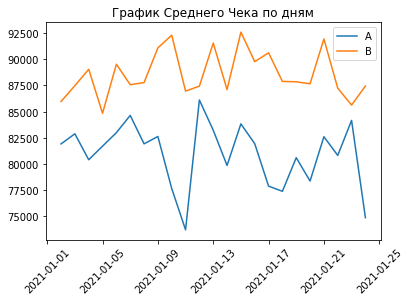

In [29]:
# график среднего чека по дням
plt.plot(df_daily[df_daily['group'] == 'A']['date'], df_daily[df_daily['group'] == 'A']['ave_price'], label='A')
plt.plot(df_daily[df_daily['group'] == 'B']['date'], df_daily[df_daily['group'] == 'B']['ave_price'], label='B')
plt.title('График Среднего Чека по дням') #Название графика
plt.xticks(rotation = 45) # Разворот названия дат на оси X на 45 градусов
plt.legend() 
plt.show() 


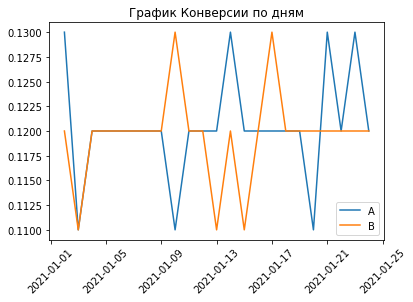

In [30]:
# график конверсии по дням
plt.plot(df_daily[df_daily['group'] == 'A']['date'], df_daily[df_daily['group'] == 'A']['conversion'], label='A')
plt.plot(df_daily[df_daily['group'] == 'B']['date'], df_daily[df_daily['group'] == 'B']['conversion'], label='B')
plt.title('График Конверсии по дням') #Название графика
plt.xticks(rotation = 45) # Разворот названия дат на оси X на 45 градусов
plt.legend() 
plt.show() 



Средний чек и конверсия по дням сильно скачут. Но каких-то выбросов не замечено.

In [31]:
# Напишем функцию для создания куммулятивной таблицы
def cummulative_table(data, group): 
    df_cumm = [] 
    for i in data['date'].unique(): 
        out = data[(data['date'] <= i) & (data['group'] == group)].groupby('group')\
                .agg({'date':'max', 'users':'sum', 'purchase':'sum', 'price':'sum'}) 
        df_cumm.append(out) 
    return pd.concat(df_cumm).reset_index() 

In [32]:
cumm_a = cummulative_table(df_daily, 'A') 
cumm_b = cummulative_table(df_daily, 'B') 

In [33]:
cumm_a['ave_price'] = round(cumm_a['price'] / cumm_a['purchase'], 2)
cumm_a['conversion'] = round(cumm_a['purchase'] / cumm_a['users'], 5)

cumm_b['ave_price'] = round(cumm_b['price'] / cumm_b['purchase'], 2)
cumm_b['conversion'] = round(cumm_b['purchase'] / cumm_b['users'], 5)

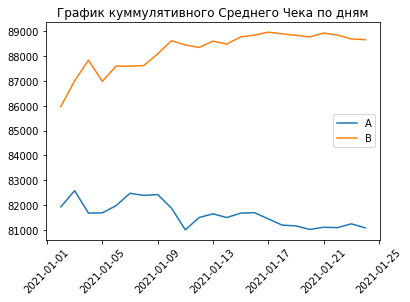

In [34]:
# Куммулятивный график среднего чека по дням
plt.plot(cumm_a['date'], cumm_a['ave_price'], label='A')
plt.plot(cumm_b['date'], cumm_b['ave_price'], label='B')
plt.title('График куммулятивного Среднего Чека по дням') #Название графика
plt.xticks(rotation = 45) # Разворот названия дат на оси X на 45 градусов
plt.legend() 
plt.show() 



Средний чек группы Б стабильно выше чека группы А. В начале были колебания, но потом данные стабилизировались.

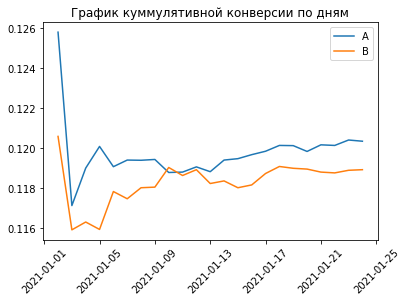

In [35]:
# Куммулятивный график среднего чека по дням
plt.plot(cumm_a['date'], cumm_a['conversion'], label='A')
plt.plot(cumm_b['date'], cumm_b['conversion'], label='B')
plt.title('График куммулятивной конверсии по дням') #Название графика
plt.xticks(rotation = 45) # Разворот названия дат на оси X на 45 градусов
plt.legend() 
plt.show() 



На графике видно, что в начале были скачки, но потом конверсия стабилизировалась. Конверсия группы А стабильно выше группы Б.

# Проверка гипотезы о равенстве конверсии

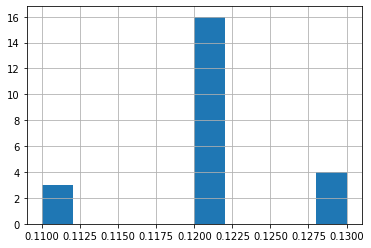

In [37]:
df_daily[df_daily['group'] == 'A']['conversion'].hist()

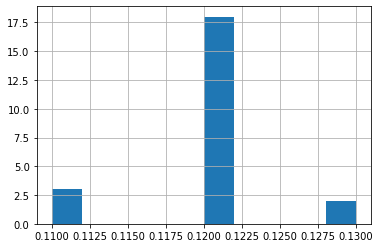

In [38]:
df_daily[df_daily['group'] == 'B']['conversion'].hist()

Распределение похоже на нормальное. Применим Z-тест

In [39]:
a = .05

x_A = 17487
x_B = 17290

n_A = 145307
n_B = 145381

p_A = x_A / n_A

p_B = x_B / n_B

p = (x_A + x_B) / (n_A + n_B)

diff = p_A - p_B

z = diff / mth.sqrt(p * (1 - p) * (1/n_A + 1/n_B))

distr = st.norm(0, 1)

z_p_val = (1 - distr.cdf(abs(z))) * 2
print('P-value равен', z_p_val)




P-value равен 0.23940749849829834


In [40]:
z_p_val < a

False

p-value Больше принятого уровня значимости, следовательно статистически значимая разница между конверсиями отсутствует. 

# Проверка гипотезы о равенстве среднего чека

Сформулируем нулевую гипотезу:
Н0: Средние чеки групп равны
Н1: Средние чеки групп не равны

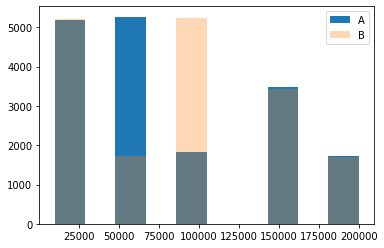

In [41]:
# Посмотрим на распределение
plt.hist(df1[(df1['group'] == 'A') & (df1['purchase'] == 1)]['price'], label='A')
plt.hist(df1[(df1['group'] == 'B') & (df1['purchase'] == 1)]['price'], label='B', alpha=0.3)
plt.legend() 
plt.show() 


Распределение не похоже на нормальное. Применим тест Манна-Уитни

In [42]:
alpha = .05

results = st.mannwhitneyu(df1[(df1['group'] == 'A') & (df1['purchase'] == 1)]['price'].values, 
                       df1[(df1['group'] == 'B') & (df1['purchase'] == 1)]['price'].values)

print('p-value', results.pvalue)

if (results.pvalue < alpha):
   print("Отвергаем нулевую гипотезы - средние чеки не равны")
else:
   print("Не отвергаем нулевую гипотезу - Средний чеки обеих групп равны")

p-value 1.412680672643368e-37
Отвергаем нулевую гипотезы - средние чеки не равны


# Проверим средние чеки по дням

Сформулируем нулевую гипотезу:

Н0: Средние чеки групп равны

Н1: Средние чеки групп не равны

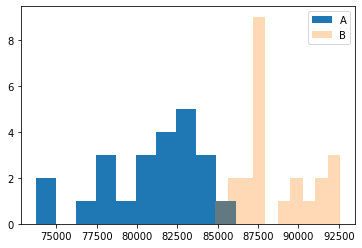

In [43]:
# Посмотрим на распределение
plt.hist(df_daily[df_daily['group'] == 'A']['ave_price'], label='A')
plt.hist(df_daily[df_daily['group'] == 'B']['ave_price'], label='B', alpha=0.3)
plt.legend() 
plt.show() 



In [44]:
alpha = .05
results = st.ttest_ind(df_daily[df_daily['group'] == 'A']['ave_price'].values, 
                       df_daily[df_daily['group'] == 'B']['ave_price'].values)

print('p-value', results.pvalue)

if (results.pvalue < alpha):
   print("Отвергаем нулевую гипотезы - Между средними чеками есть разница")
else:
   print("Не отвергаем нулевую гипотезу - разницы нет")

p-value 2.2523650297552113e-12
Отвергаем нулевую гипотезы - Между средними чеками есть разница


# Вывод

Не смотря на то, что конверсия группы Б ниже, статистической значимости в конверсии не достигнуто, соответственно считать конверсии разными оснований нет.
Зато Средний чек группы Б значительно выше, среднего чека группы А. Статистическая значимость достигнута.

Рекомендуем признать, что вариант Б, лучше, чем вариант А